In [1]:
import synthx as sx

### Normal

In [2]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=10,
    intervention_units=[1, 2],
    intervention_time=40,
    intervention_effect=1.03,
    noise_effect=1,
    scale=2000,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column='unit',
    time_column='time',
    y_column='y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2],
    intervention_time=40,
    validation_time=35,
)

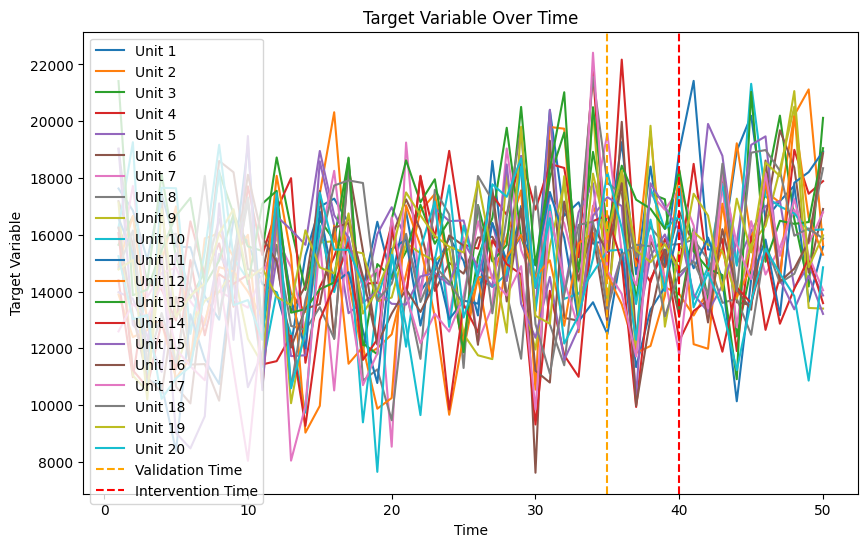

In [4]:
dataset.plot()

In [5]:
sc = sx.synthetic_control(dataset)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.07it/s]


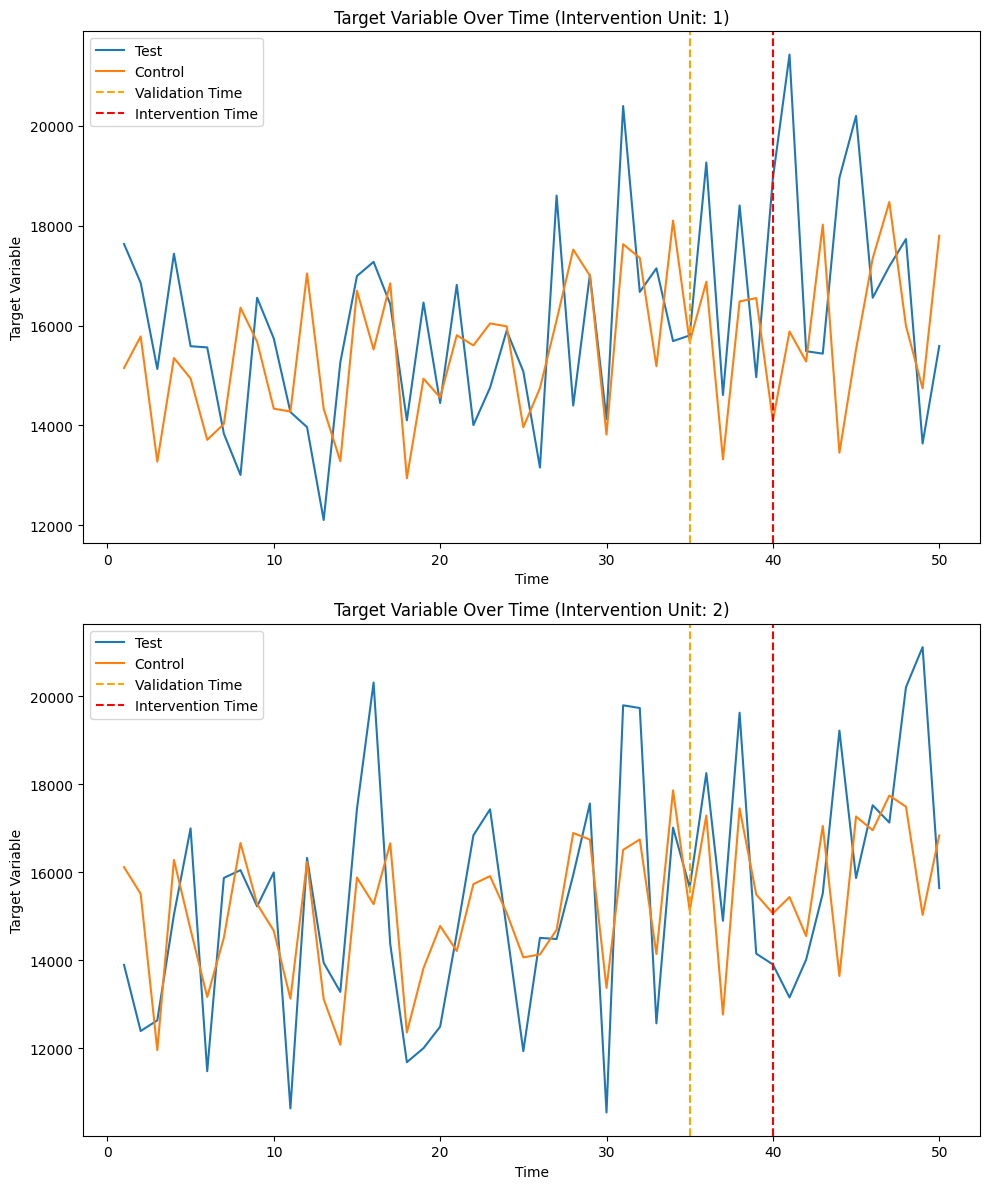

In [6]:
sc.plot()

In [7]:
sc.estimate_effects()

[1072.078915767244, 641.3329218498243]

### z score normalization

In [8]:
df = sx.sample(
    n_units=20,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=10,
    intervention_units=1,
    intervention_time=40,
    intervention_effect=1.05,
    noise_effect=0.2,
    scale=100,
    seed=42,
)

In [9]:
dataset = sx.Dataset(
    df,
    unit_column='unit',
    time_column='time',
    y_column='y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=40,
    norm='z',
)

In [10]:
sc = sx.synthetic_control(dataset)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.32it/s]


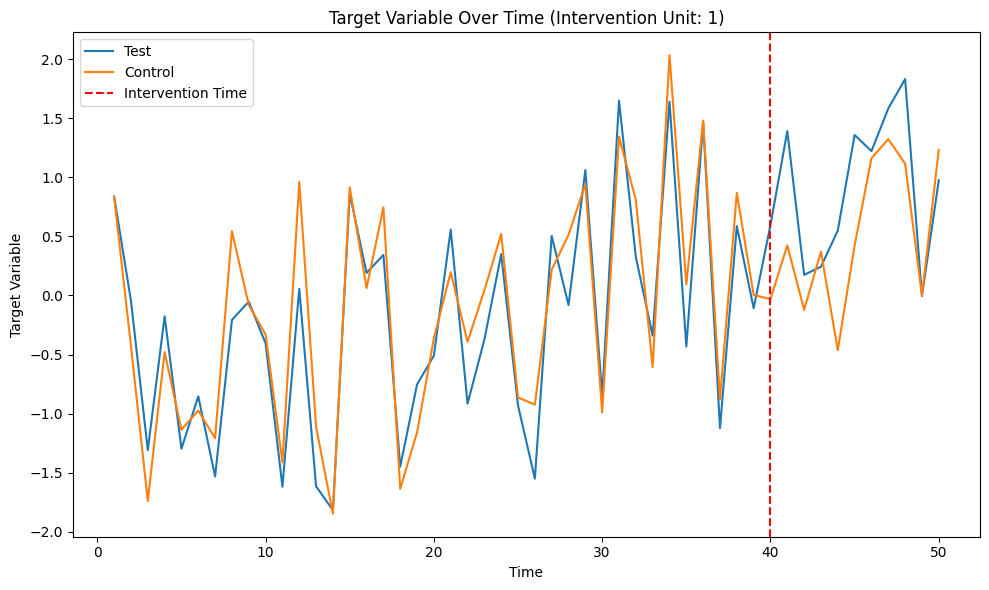

In [11]:
sc.plot()

In [12]:
sc.estimate_effects()

[0.522649030629764]

### CV normalization

In [13]:
dataset = sx.Dataset(
    df,
    unit_column='unit',
    time_column='time',
    y_column='y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=40,
    norm='cv',
)

In [14]:
sc = sx.synthetic_control(dataset)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.33it/s]


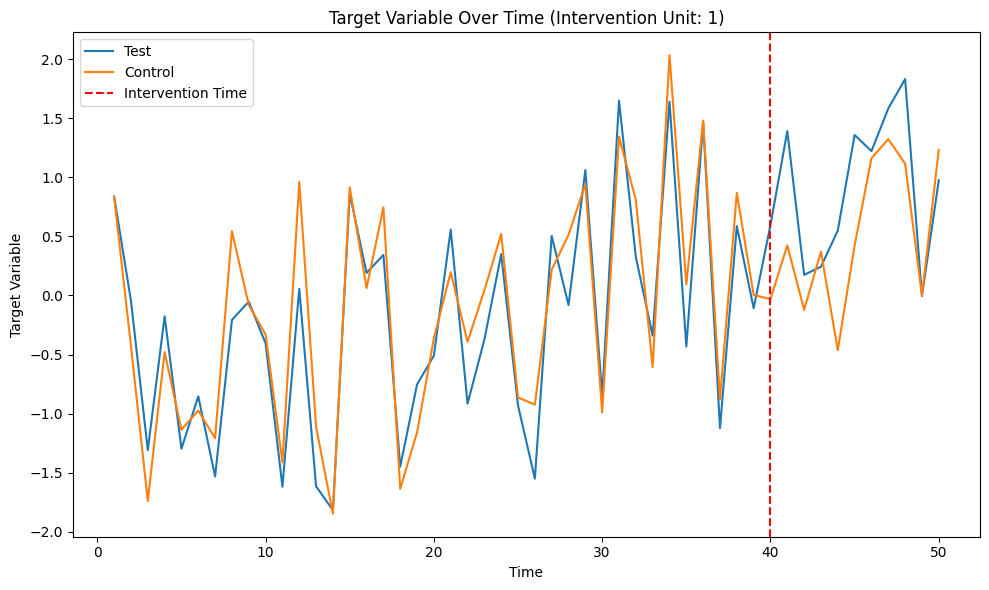

In [15]:
sc.plot()

In [16]:
sc.estimate_effects()

[0.5226490320292705]

### yeo-johnson normalization

In [17]:
dataset = sx.Dataset(
    df,
    unit_column='unit',
    time_column='time',
    y_column='y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=1,
    intervention_time=40,
    norm='yeo_johnson',
)

In [18]:
sc = sx.synthetic_control(dataset)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.41it/s]


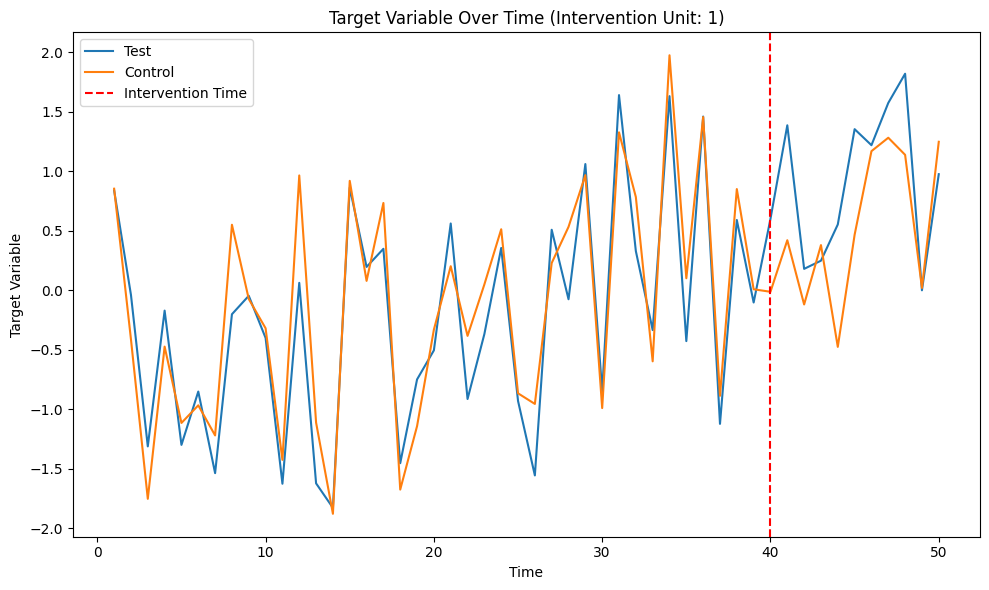

In [19]:
sc.plot()

In [20]:
sc.estimate_effects()

[0.5125211791114719]